# Installation und Einbindung von Packages

Es wird der builtin Package-Manager "Pkg" verwendet. Für jedes Notebook wird eine eigene Environment erstellt. In jeder dieser Environments findet eine unabhängige Paketverwaltung statt.

Zuerst binden wir das Package "Pkg" ein. Mit der Methode "add" können wir das Package "Plots" hinzufügen. Anschließend aktivieren wir die Environment "conf/01-julia_basics". Es wird für alle Notebooks der Ordner "conf" verwendet, um die Struktur übersichtlicher zu halten. In den Unterordnern von "conf" befinden sich die Konfigurationsdateien der Environments, z.B. in "conf/01-julia_basics" befindet sich die "Project.toml" und "Manifest.tomp", die Auskunft über die verwendeten Packages (dependencies) und die verwendete Julia Version gibt.

Der nachfolgende Codeblock nimmt möglicherweise mehrere Minuten in Anspruch, bis dieser durchgelaufen ist, da etliche Packages installiert werden, auf die Plots aufbaut. Eine erneute Ausführung in einer frischen Kernel-Instanz kann ebenfalls eine Minute in Anspruch nehmen.

In [1]:
# Paket "Pkg" verwenden
using Pkg
# beispielhaft Package "Plots" der Version "1.40.9" der Environment hinzufügen
Pkg.add(PackageSpec(name="Plots", version="1.40.9"))
# Environment aktivieren
Pkg.activate(joinpath(dirname(pwd()), "Notebooks", "conf", "01-julia_basics"))
# Environment instantiieren
Pkg.instantiate()
# Anzeigen, ob Pakete aktualisierbar sind
Pkg.status()

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
  Activating project at `/media/johannes/DATA/Syncthing/Programmierung/MathData-SoSe22/Notebooks/conf/01-julia_basics`


Status `/media/johannes/DATA/Syncthing/Programmierung/MathData-SoSe22/Notebooks/conf/01-julia_basics/Project.toml`
⌃ [91a5bcdd] Plots v1.40.9
Info Packages marked with ⌃ have new versions available and may be upgradable.


Um nicht in jedem Notebook die gesamte Environment neu zu erstellen, wurden die Environments mit conf/setup.jl vorab generiert und nachfolgend nur geladen.

# Variablen

In [3]:
my_integer = 4

4

In [4]:
typeof(my_integer)

Int64

In [5]:
my_float = 2.3

2.3

In [6]:
typeof(my_float)

Float64

In [7]:
my_complex_number = 2 + 3im
typeof(my_complex_number)

Complex{Int64}

In [8]:
my_complex_number2 = 2.2 + 3.2im
typeof(my_complex_number2)

ComplexF64 (alias for Complex{Float64})

In [9]:
?Complex

Base.Meta.ParseError: ParseError:
# Error @ /media/johannes/DATA/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X13sZmlsZQ==.jl:1:1
?Complex
╙ ── not a unary operator

In [10]:
# support for latex
α = 2π

6.283185307179586

In [11]:
cos(α)

1.0

# Grundlende Syntax für mathematische Operationen

In [12]:
summation = 2 + 3

5

In [13]:
difference = 5 - 2

3

In [14]:
product = 3 * 5

15

In [15]:
quotient = 4 / 5

0.8

In [16]:
rational = 4 // 5
rational, typeof(rational)

(4//5, Rational{Int64})

In [17]:
power = 5^2

25

In [18]:
power = 5.0^2

25.0

# Control Flow

### For loops

The syntax for a `for` loop is 
```julia
for *var* in *loop iterable*
    *loop body*
end
```

In [19]:
a = [1, 2, 3, 4, 5]
for aᵢ in a
    @show aᵢ
end

aᵢ = 1
aᵢ = 2
aᵢ = 3
aᵢ = 4
aᵢ = 5


## If statements

In [20]:
v = 3
w = 3

if v < w
    println("v < w")
elseif v > w
    println("v > w")
else
    println("v == w")
end

v == w


# Arrays

Julia has built-in support multi-dimensional arrays (i.e. tensors).

In [21]:
vector = [1, 2, 3, 4, 5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [22]:
matrix = [1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [23]:
spacing_matrix = [1 2 3
                  4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [24]:
random_matrix = rand(1:10, 4, 5)

4×5 Matrix{Int64}:
 3  4   6  8  2
 9  6   4  7  6
 2  7   6  4  3
 2  4  10  5  6

In [25]:
random_tensor = rand(1:10, 2, 3, 4)

2×3×4 Array{Int64, 3}:
[:, :, 1] =
 5  1   7
 9  8  10

[:, :, 2] =
 2  7  1
 6  8  3

[:, :, 3] =
 2  4  1
 2  4  2

[:, :, 4] =
 3  6  10
 5  2   1

### Manipulation von Arrays 

In [26]:
vector

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [27]:
vector[2:4]

3-element Vector{Int64}:
 2
 3
 4

In [28]:
vector[4:end]

2-element Vector{Int64}:
 4
 5

In [29]:
matrix

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [30]:
matrix[:, 2]

2-element Vector{Int64}:
 2
 5

In [31]:
matrix[1,:]

3-element Vector{Int64}:
 1
 2
 3

In [32]:
matrix[:, 1:2]

2×2 Matrix{Int64}:
 1  2
 4  5

In [33]:
[vector vector]

5×2 Matrix{Int64}:
 1  1
 2  2
 3  3
 4  4
 5  5

In [34]:
[vector; vector]

10-element Vector{Int64}:
 1
 2
 3
 4
 5
 1
 2
 3
 4
 5

In [35]:
[matrix matrix]

2×6 Matrix{Int64}:
 1  2  3  1  2  3
 4  5  6  4  5  6

In [36]:
[matrix; matrix]

4×3 Matrix{Int64}:
 1  2  3
 4  5  6
 1  2  3
 4  5  6

# Functions, Multiple Dispatch

A typical function has the form
```julia
function *func_name*(*arg1*, *arg2*, ...)
   *body* 
end
```

In [37]:
function biased_sum(a, b)
    a + b + 2
end 

biased_sum (generic function with 1 method)

In [38]:
biased_sum(2, 3)

7

In [39]:
methods(biased_sum)

# 1 method for generic function "biased_sum" from Main:
 [1] biased_sum(a, b)
     @ /media/johannes/DATA/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:1

In [40]:
function biased_sum(a::Integer, b::Integer)
    a + b - 3
end

biased_sum (generic function with 2 methods)

In [41]:
biased_sum(2, 3)

2

In [42]:
biased_sum(5.0, 2.0)

9.0

In [43]:
methods(biased_sum)

# 2 methods for generic function "biased_sum" from Main:
 [1] biased_sum(a::Integer, b::Integer)
     @ /media/johannes/DATA/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y101sZmlsZQ==.jl:1
 [2] biased_sum(a, b)
     @ /media/johannes/DATA/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:1

In [44]:
biased_sum(a::Complex, b) = a + b - 2im

biased_sum (generic function with 3 methods)

In [45]:
biased_sum(2+3im, 2)

4 + 1im

In [46]:
# Keyword arguments

In [47]:
function biased_pow(a, b; bias::Bool = true)
    if bias
        a^b - 3
    else
        a^b
    end
end

biased_pow (generic function with 1 method)

In [48]:
biased_pow(2, 3)

5

In [49]:
biased_pow(2, 3; bias = false)

8

In [50]:
biased_pow(2, 3; bias = true)

5

# Lineare Algebra

In [51]:
using LinearAlgebra

In [52]:
b = [1; 2; 1]
A = [1 2 3; 2 3 5; 1 0 4]

3×3 Matrix{Int64}:
 1  2  3
 2  3  5
 1  0  4

In [53]:
dot(b, b)

6

In [54]:
b ⋅ b 

6

In [55]:
det(A)

-3.0

In [56]:
cross(b, A[:,2])

3-element Vector{Int64}:
 -3
  2
 -1

In [57]:
v = b × A[:,2]

3-element Vector{Int64}:
 -3
  2
 -1

In [58]:
v ⋅ b

0

In [59]:
w = A\b

3-element Vector{Float64}:
  1.0
 -0.0
  0.0

In [60]:
b - A*w

3-element Vector{Float64}:
 0.0
 0.0
 0.0

# Statistik

In [61]:
using Statistics, Plots

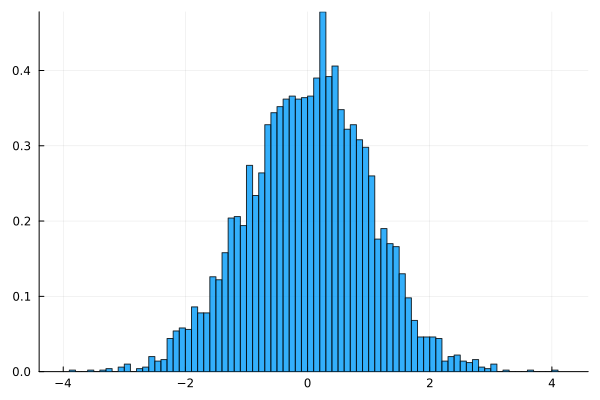

In [62]:
Ω = randn(5000);
histogram(Ω, legend = false, norm=true, nbins = 100, alpha = 0.8)

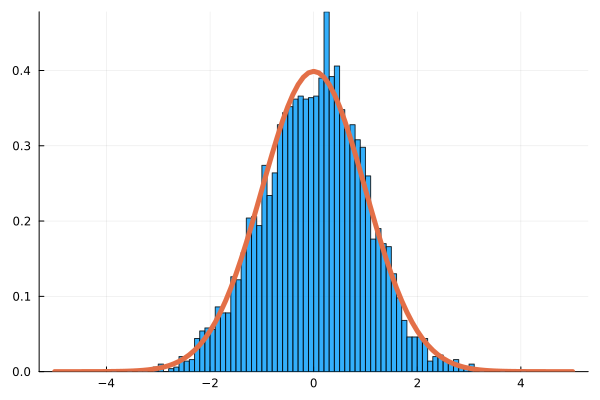

In [63]:
x = -5:0.1:5
plot!(x, 1/sqrt(2*π) .* exp.(-x.^2 ./ 2), linewidth = 5)

In [64]:
mean(Ω)

0.01718068789147503

In [65]:
var(Ω)

0.9853602394567471